In [1]:
from pycaret.utils import version
version()

1.0.0


In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
from pycaret.regression import *
reg1 = setup(data, target = 'charges', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [4]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,2700.83,2.30897e+07,4786.7,0.8356,0.4393,0.3121
1,Gradient Boosting Regressor,2703.81,2.32465e+07,4801.98,0.8347,0.4399,0.3117
2,CatBoost Regressor,2843.34,2.471e+07,4953.7,0.8245,0.4646,0.3371
3,Random Forest,2745.98,2.49513e+07,4980.28,0.8207,0.4686,0.3305
4,Light Gradient Boosting Machine,2959.56,2.52365e+07,5013.09,0.8171,0.5427,0.3685
5,AdaBoost Regressor,4162.23,2.83283e+07,5316.61,0.7985,0.6349,0.7263
6,Extra Trees Regressor,2801.1,2.86317e+07,5322.29,0.7981,0.489,0.3341
7,Lasso Least Angle Regression,4315.79,3.8356e+07,6173.87,0.7311,0.6105,0.4415
8,Ridge Regression,4336.23,3.83815e+07,6175.95,0.7309,0.6193,0.4454
9,Linear Regression,4323.61,3.83801e+07,6175.72,0.7308,0.6175,0.4432


In [5]:
xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2541.5527,2.016040e+07,4490.0337,0.8796,0.4380,0.3132
1,3094.6174,3.141311e+07,5604.7404,0.8174,0.4499,0.2942
2,2621.7145,2.205842e+07,4696.6392,0.7207,0.4730,0.3151
3,2832.1913,2.088904e+07,4570.4534,0.8256,0.4640,0.3761
4,2843.1877,2.663500e+07,5160.9105,0.8019,0.4938,0.3242
5,2604.7492,1.952425e+07,4418.6254,0.8744,0.3446,0.2446
6,2411.7493,1.893597e+07,4351.5480,0.8712,0.3574,0.2808
7,2760.3791,2.586744e+07,5086.0041,0.8578,0.4421,0.2784
8,2368.5776,1.845341e+07,4295.7433,0.8808,0.3976,0.3104
9,2929.5884,2.696036e+07,5192.3368,0.8263,0.5322,0.3844


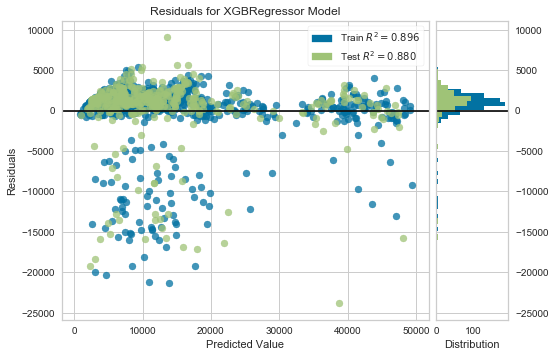

In [6]:
plot_model(xgboost)

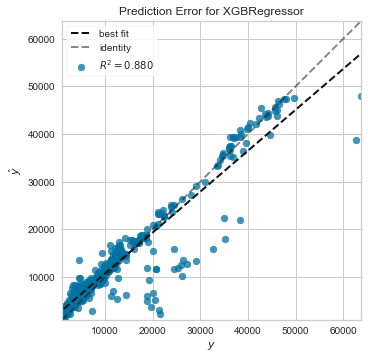

In [7]:
plot_model(xgboost, plot = 'error')

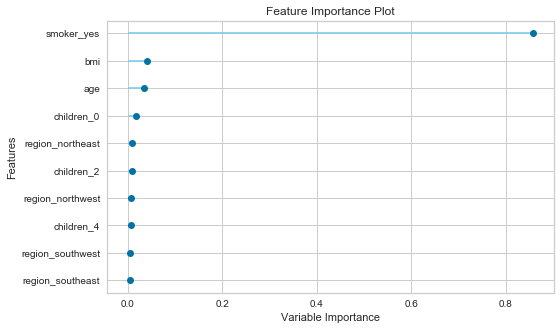

In [8]:
plot_model(xgboost, plot = 'feature')

In [11]:
holdout = predict_model(xgboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,2368.8504,1.709973e+07,4135.1815,0.8803,0.3938,0.2892


In [12]:
final_xgboost = finalize_model(xgboost)

In [13]:
save_model(final_xgboost,'powerbi_deployment')

Transformation Pipeline and Model Succesfully Saved


# Loading back

In [15]:
loaded_pipeline = load_model('powerbi_deployment')
print(loaded_pipeline)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(t